In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

In [3]:
file = "Resources/scrubbed_csv.csv"
ufo_data = pd.read_csv(file)
ufo_data.head()

C:\Users\Cameron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
ufo_clean = ufo_data.dropna()


#print(len(ufo_clean))


ufo_clean = ufo_clean.loc[ufo_clean["country"] == "us"]
#ufo_clean = str.split('datetime')

print(len(ufo_clean))

ufo_clean.head()

63553


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333


In [5]:
ufo_clean[['month', 'day', 'year']] = ufo_clean['datetime'].str.split('/',expand=True)
ufo_clean[['year', 'time']] = ufo_clean['year'].str.split(' ',expand=True)

In [6]:
ufo_month = ufo_clean[["city", "state", "shape", "month", "day", "year", "time", "latitude", "longitude ", "duration (seconds)" ]]

ufo_month = ufo_month.dropna()

ufo_month.head(15)

#ufo_month["month"].value_counts()

,city,state,shape,month,day,year,time,latitude,longitude,duration (seconds)
0,san marcos,tx,cylinder,10,10,1949,20:30,29.8830556,-97.941111,2700
3,edna,tx,circle,10,10,1956,21:00,28.9783333,-96.645833,20
4,kaneohe,hi,light,10,10,1960,20:00,21.4180556,-157.803611,900
5,bristol,tn,sphere,10,10,1961,19:00,36.595,-82.188889,300
7,norwalk,ct,disk,10,10,1965,23:45,41.1175,-73.408333,1200
8,pell city,al,disk,10,10,1966,20:00,33.5861111,-86.286111,180
9,live oak,fl,disk,10,10,1966,21:00,30.2947222,-82.984167,120
10,hawthorne,ca,circle,10,10,1968,13:00,33.9163889,-118.351667,300
11,brevard,nc,fireball,10,10,1968,19:00,35.2333333,-82.734444,180
12,bellmore,ny,disk,10,10,1970,16:00,40.6686111,-73.527500,1800


In [7]:
ufo_city_group = ufo_month.groupby(['city']).count()
ufo_city_group.sort_values(by="month", ascending = False).head(10)
#most sightings by city for all sightings reported


,state,shape,month,day,year,time,latitude,longitude,duration (seconds)
city,,,,,,,,,
seattle,468,468,468,468,468,468,468,468,468
phoenix,435,435,435,435,435,435,435,435,435
las vegas,356,356,356,356,356,356,356,356,356
portland,353,353,353,353,353,353,353,353,353
los angeles,343,343,343,343,343,343,343,343,343
san diego,325,325,325,325,325,325,325,325,325
houston,290,290,290,290,290,290,290,290,290
chicago,255,255,255,255,255,255,255,255,255
tucson,237,237,237,237,237,237,237,237,237


In [8]:
ufo_city_group = ufo_month.groupby(['year']).count()
ufo_city_group.sort_values(by="month", ascending = False).head(10)
#most sightings by year for all sightings reported

,city,state,shape,month,day,time,latitude,longitude,duration (seconds)
year,,,,,,,,,
2012,6216,6216,6216,6216,6216,6216,6216,6216,6216
2013,5961,5961,5961,5961,5961,5961,5961,5961,5961
2011,4306,4306,4306,4306,4306,4306,4306,4306,4306
2008,3944,3944,3944,3944,3944,3944,3944,3944,3944
2009,3585,3585,3585,3585,3585,3585,3585,3585,3585
2010,3488,3488,3488,3488,3488,3488,3488,3488,3488
2007,3430,3430,3430,3430,3430,3430,3430,3430,3430
2004,3177,3177,3177,3177,3177,3177,3177,3177,3177
2005,3160,3160,3160,3160,3160,3160,3160,3160,3160


In [9]:
year_df = ufo_month.loc[(ufo_month['year'] == '2012')]
year_df.count()
#verify how many sightings are in a chosen year

city                  6216
state                 6216
shape                 6216
month                 6216
day                   6216
year                  6216
time                  6216
latitude              6216
longitude             6216
duration (seconds)    6216
dtype: int64

In [10]:
year_df_group = year_df.groupby(['city']).count()
year_df_group.sort_values(by="state", ascending = False).head(10)
#top city sightings in year group

,state,shape,month,day,year,time,latitude,longitude,duration (seconds)
city,,,,,,,,,
las vegas,41,41,41,41,41,41,41,41,41
seattle,38,38,38,38,38,38,38,38,38
springfield,35,35,35,35,35,35,35,35,35
myrtle beach,34,34,34,34,34,34,34,34,34
portland,32,32,32,32,32,32,32,32,32
phoenix,31,31,31,31,31,31,31,31,31
chicago,29,29,29,29,29,29,29,29,29
orlando,27,27,27,27,27,27,27,27,27
sacramento,26,26,26,26,26,26,26,26,26


In [11]:
ufo_month.astype({"year":'int64'}).dtypes
#determine data type for latitude and longitude
#change year to integer

city                   object
state                  object
shape                  object
month                  object
day                    object
year                    int64
time                   object
latitude               object
longitude             float64
duration (seconds)     object
dtype: object

In [22]:
top_cities_year_df = year_df.loc[(year_df['city'] == 'seattle') | (year_df['city'] == 'phoenix') | (year_df['city'] == 'las vegas') | (year_df['city'] == 'los angeles') | (year_df['city'] == 'portland') | (year_df['city'] == 'san diego') | (year_df['city'] == 'houston') | (year_df['city'] == 'chicago') | (year_df['city'] == 'tucson') | (year_df['city'] == 'miami')] 
top_cities_year_df['Airport Name'] = ""
top_cities_year_df['Airport Lat'] = ""
top_cities_year_df['Airport Lng'] = ""
cities_airport_df = top_cities_year_df.loc[(top_cities_year_df['state'] != 'me') | (top_cities_year_df['state'] != 'ok')]
cities_airport_df.head(10)

#create dataframe to hold airport lat and lng from API call and to parse down to top sighting cities for chosen year

<ipython-input-22-c9f929ecb36e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cities_year_df['Airport Name'] = ""
<ipython-input-22-c9f929ecb36e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cities_year_df['Airport Lat'] = ""
<ipython-input-22-c9f929ecb36e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,city,state,shape,month,day,year,time,latitude,longitude,duration (seconds),Airport Name,Airport Lat,Airport Lng
248,san diego,ca,sphere,10,10,2012,18:56,32.7152778,-117.156389,240,,,
259,phoenix,az,sphere,10,10,2012,20:45,33.4483333,-112.073333,300,,,
451,phoenix,az,sphere,10,11,2012,21:01,33.4483333,-112.073333,30,,,
1156,chicago,il,unknown,10,12,2012,4:10,41.85,-87.650000,7200,,,
1164,phoenix,az,other,10,12,2012,18:55,33.4483333,-112.073333,300,,,
1171,tucson,az,chevron,10,12,2012,19:30,32.2216667,-110.925833,6,,,
2833,san diego,ca,circle,10,18,2012,1:00,32.7152778,-117.156389,900,,,
3941,las vegas,nv,light,10,22,2012,9:17,36.175,-115.136389,240,,,
4157,las vegas,nv,other,10,23,2012,14:30,36.175,-115.136389,300,,,
4365,tucson,az,changing,10,24,2012,9:30,32.2216667,-110.925833,35,,,


In [56]:
# Count how many sightings have occured within each city
cities_airport_df["city"].count
ufo_city_only = cities_airport_df.groupby(['city']).count()
ufo_city_only

,state,shape,month,day,year,time,latitude,longitude,duration (seconds),Airport Name,Airport Lat,Airport Lng
city,,,,,,,,,,,,
chicago,29,29,29,29,29,29,29,29,29,29,29,29
houston,16,16,16,16,16,16,16,16,16,16,16,16
las vegas,41,41,41,41,41,41,41,41,41,41,41,41
los angeles,15,15,15,15,15,15,15,15,15,15,15,15
miami,22,22,22,22,22,22,22,22,22,22,22,22
phoenix,31,31,31,31,31,31,31,31,31,31,31,31
portland,32,32,32,32,32,32,32,32,32,32,32,32
san diego,20,20,20,20,20,20,20,20,20,20,20,20
seattle,38,38,38,38,38,38,38,38,38,38,38,38


In [85]:
#put city count to a dataframe
city_count = ufo_city_only.rename(columns={"state": "sightings"}, errors="raise")
city_count = city_count[["sightings"]]
city_count

,sightings
city,
chicago,29
houston,16
las vegas,41
los angeles,15
miami,22
phoenix,31
portland,32
san diego,20
seattle,38


In [86]:
#reset index so city is a column
city_count = city_count.reset_index()
city_count

,city,sightings
0,chicago,29
1,houston,16
2,las vegas,41
3,los angeles,15
4,miami,22
5,phoenix,31
6,portland,32
7,san diego,20
8,seattle,38
9,tucson,12


Text(0, 0.5, 'Number of Sightings')

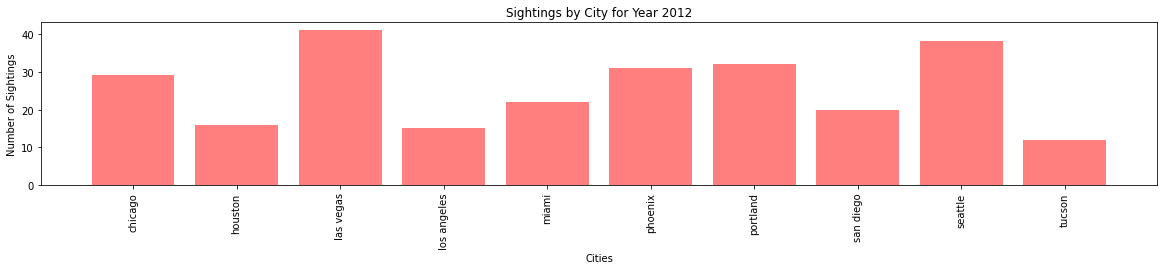

In [88]:
#Create a bar chart based upon the above data
plt.figure(figsize=(20,3))
plt.bar(city_count["city"], city_count["sightings"], color='r', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, city_count["city"], rotation="vertical")

plt.title("Sightings by City for Year 2012")
plt.xlabel("Cities")
plt.ylabel("Number of Sightings")

In [89]:
#make API call for airport latitude and longitude around cities with most sightings
from config import gkey


# geocoordinates
target_radius = 5000
target_type = "airport"

# set up a parameters dictionary
params = {
    "radius": target_radius,
    "type": target_type,
    "key": gkey
}

for index, row in cities_airport_df.iterrows():
    lat = row['latitude']
    lng = row['longitude ']
    
    params["location"] = f"{lat},{lng}" 
   
    # base url
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # run a request using our params dictionary
    response = requests.get(base_url, params=params)
    airport_data = response.json()
    print(airport_data)
    try:
        cities_airport_df.loc[index, 'Airport Name'] = airport_data['results'][0]['name']
        cities_airport_df.loc[index, 'Airport Lat'] = airport_data['results'][0]['geometry']['location']['lat']
        cities_airport_df.loc[index, 'Airport Lng'] = airport_data['results'][0]['geometry']['location']['lng']
      
    except (KeyError, IndexError):
        print("Missing airport")


{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.7338006, 'lng': -117.1933038}, 'viewport': {'northeast': {'lat': 32.73631865000001, 'lng': -117.17930055}, 'southwest': {'lat': 32.72624644999999, 'lng': -117.22126875}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'San Diego International Airport', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118240381006534588668">Mae Santi</a>'], 'photo_reference': 'ATtYBwJN6WNIyrPzvRxXY78LG2s3uvE9SYg07VEg65IUB-yHXyTuSZ9MuOrmHxNySGEpFxylroc1ioM0BRgel-uhg7F5l1gDxKJFOkePVWZf3jrumbdY0Ti35Ejw4CFOqyQVokVmDDKKIjU_e5RrAXYQB9GbwajySW6yT9RdEziJZM3zYttL', 'width': 4032}], 'place_id': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'plus_code': {'compound_code': 'PRM4+GM San Diego, CA, USA', 'global_code': '8544PRM4+GM'}, 'rating': 4.2, 'reference': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'scope': 'GOOGLE', 'types': ['airport',

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2419859, 'lng': -110.9464129}, 'viewport': {'northeast': {'lat': 32.24350363029149, 'lng': -110.9451829697085}, 'southwest': {'lat': 32.24080566970849, 'lng': -110.9478809302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Helipad 1', 'place_id': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'plus_code': {'compound_code': '63R3+QC Tucson, AZ, USA', 'global_code': '854F63R3+QC'}, 'reference': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1552-1572 North Warren Avenue, Tucson'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2418351, 'lng': -110.9468035}, 'viewport': {'northeast': {'lat': 32.2434189302915, 'lng': -110.9454179697085}, 'southwest': {'lat': 32.2407209697085, 'lng': -110.9481159302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2419859, 'lng': -110.9464129}, 'viewport': {'northeast': {'lat': 32.24350363029149, 'lng': -110.9451829697085}, 'southwest': {'lat': 32.24080566970849, 'lng': -110.9478809302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Helipad 1', 'place_id': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'plus_code': {'compound_code': '63R3+QC Tucson, AZ, USA', 'global_code': '854F63R3+QC'}, 'reference': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1552-1572 North Warren Avenue, Tucson'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2418351, 'lng': -110.9468035}, 'viewport': {'northeast': {'lat': 32.2434189302915, 'lng': -110.9454179697085}, 'southwest': {'lat': 32.2407209697085, 'lng': -110.9481159302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'next_page_token': 'ATtYBwJ-8NiAelOBvL-5AmBgZ0Kyuy6H0nlcOMIa0mG5d2ydmV0GapTsnPk_UeTL2hAXJXvzIxVkihZvuA8O6Dy1id0lt-9Jujbmk0zpHG3rQXj2-2Ltxx_VSNX5ktXftfoMh6gDlSqXK-sZgaw9PUtaOyjhKeGaT_NThCV7NdNEeXsbTpCI0PWzYNJJ9vXZMqsq3cQdD-DOGxX1ri0Zjy4JC63Apyq94f51pRkuAYQV3fnv8AusI-XlN6xorhTCgAWxJdFQQorq9Z2CApTgLocpuMM6NqPMOhEiCymt7YacClaX4BH8XPHTJ3cyiHCMBszBwa76Vc2AFfqq7HsL4ut9VFe8RXPCHPJlB5gIeFUaMD8gIVnbMVeNVa5Bb-C-OoFG5fkU53F5e4_VBwVGN8BKQec95mM0YtSo29sXill8Wzy7BiWJLmre35rL', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwIMHfsayA9Tn5uU0lxvzy_L9AVXkmK5jYkRXPIlr_KL6YdHYtgtkLe3AaN3lB1LzxcfoULVhmt0-kCAddXVuaqA3YRSJV_WV1s4eN_i5B2SQ2HSDVDiThwa5FuI8KYLhSMHpGEUcyxmXgB7BxpvL_hR4TECwvv-b4W7oQI8oB4mSQ09', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 29.7895795, 'lng': -95.35374739999999}, 'viewport': {'northeast': {'lat': 29.7910329302915, 'lng': -95.3523998197085}, 'southwest': {'lat': 29.7883349697085, 'lng': -95.35509778029152}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png', 'name': 'Yellow Cab Houston', 'opening_hours': {'open_now': True}, 'photos': [{'height': 2988, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/102200669709950481814">Anthony Berry</a>'], 'photo_reference': 'ATtYBwLG4hKVK7_vJF5NViTFoYzF9hyrXVtzf0ySw4aSuyp8d0y2_ZKBG8dCSUwYdjvn9KeHNYrqBLmWN0wIHGnxulpB9c9cRtjeHpBCVLq88ixNAV4SfoSInyl6iZ5GzB2NQwN4tsngC_RcIoFToMd23UIBBTm6Ch3JwFUPgQrKPWqCfzN-', 'width': 5312}], 'place_id': 'ChIJ7YH7vdi4QIYRZPDMneXIQoI', 'plus_code': {'compound_code': 'QJQW+RG Northside, Houston, TX, USA', 'global_code': '76X6QJQW+RG'}, 'rating': 1.8, 'reference': 'ChIJ7YH7vd

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 29.7895795, 'lng': -95.35374739999999}, 'viewport': {'northeast': {'lat': 29.7910329302915, 'lng': -95.3523998197085}, 'southwest': {'lat': 29.7883349697085, 'lng': -95.35509778029152}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png', 'name': 'Yellow Cab Houston', 'opening_hours': {'open_now': True}, 'photos': [{'height': 2988, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/102200669709950481814">Anthony Berry</a>'], 'photo_reference': 'ATtYBwIBInEpblzHy6e3v2rGShR0EMnBpr020MjFfYHUyWx91oPYnFInShmqifsPHR31q-XZLOCNYj3-StOnyE90UYyr6M1Sx60mcnD1JpT4urmquRLai0m1k9h4wIxdrUAsUJvCetfWtXA_SQOdCnuALFLG9ok-cwviRaIyEhyo8A8MH896', 'width': 5312}], 'place_id': 'ChIJ7YH7vdi4QIYRZPDMneXIQoI', 'plus_code': {'compound_code': 'QJQW+RG Northside, Houston, TX, USA', 'global_code': '76X6QJQW+RG'}, 'rating': 1.8, 'reference': 'ChIJ7YH7vd

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 29.7895795, 'lng': -95.35374739999999}, 'viewport': {'northeast': {'lat': 29.7910329302915, 'lng': -95.3523998197085}, 'southwest': {'lat': 29.7883349697085, 'lng': -95.35509778029152}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png', 'name': 'Yellow Cab Houston', 'opening_hours': {'open_now': True}, 'photos': [{'height': 2988, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/102200669709950481814">Anthony Berry</a>'], 'photo_reference': 'ATtYBwIONQfT28RWw6lYHU-Di7ncCnxerIum0JnL23h7jekjCCjuT2voaNVxfmDNiNWXX_T4yVXLcsGNEMzBsVq5U9oSMZXyc5Yrc7icAk-ffksjH9Py9QegGoY7iLAxk2kfeTtnG8_5RAGSn5w1faPjtw533GXmv6YefahUiUC3XiuO3hjl', 'width': 5312}], 'place_id': 'ChIJ7YH7vdi4QIYRZPDMneXIQoI', 'plus_code': {'compound_code': 'QJQW+RG Northside, Houston, TX, USA', 'global_code': '76X6QJQW+RG'}, 'rating': 1.8, 'reference': 'ChIJ7YH7vd

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2419859, 'lng': -110.9464129}, 'viewport': {'northeast': {'lat': 32.24350363029149, 'lng': -110.9451829697085}, 'southwest': {'lat': 32.24080566970849, 'lng': -110.9478809302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Helipad 1', 'place_id': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'plus_code': {'compound_code': '63R3+QC Tucson, AZ, USA', 'global_code': '854F63R3+QC'}, 'reference': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1552-1572 North Warren Avenue, Tucson'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2418351, 'lng': -110.9468035}, 'viewport': {'northeast': {'lat': 32.2434189302915, 'lng': -110.9454179697085}, 'southwest': {'lat': 32.2407209697085, 'lng': -110.9481159302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 43.64647850000001, 'lng': -70.30969739999999}, 'viewport': {'northeast': {'lat': 43.65095974999999, 'lng': -70.30773469999998}, 'southwest': {'lat': 43.64498475000002, 'lng': -70.31558549999998}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Portland International Jetport', 'photos': [{'height': 1152, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/116313041347137706158">Paul Collins</a>'], 'photo_reference': 'ATtYBwKYRQtBjlvUcchBODq4hU9mYFrqc06gfdImx1kl5Xic5rOzt7qiBet1TXipgFbaftXra1EtbN9rokrLc0k4vqslb8lLU0uLOIFF7Tnfx1LhWWvqsn6Wfo1Kh_BhtYRHf1qwQfB8i_JFWDeEd9SYp1gHWXT8cRbN1jZqXcY8jaLfLIAt', 'width': 2048}], 'place_id': 'ChIJgasuJFmZskwRzz72S4Wlx_s', 'plus_code': {'compound_code': 'JMWR+H4 Portland, ME, USA', 'global_code': '87MFJMWR+H4'}, 'rating': 4.4, 'reference': 'ChIJgasuJFmZskwRzz72S4Wlx_s', 'scope': 'GOOGL

{'html_attributions': [], 'next_page_token': 'ATtYBwIpe6bTLV72B96QryR6KDXhhtv8knSQqXRcjCPGiwOWCif8bxR1vq63GjQ_-zMgsqfgOOsoaYDveQZ37OiovBpDE6m7COvb-AMXrvlToqVLmXc9Vdb8rmuxVPT7oHXXCltVM2Lf5c2j1k3zmyJN3RCC4tjaAtwqvEE-fipzOLuNzvILMQwYEATmG2LxT469Mh8wVA0DwLFOMsEqkLneq7ANfFb0vBY3Hr7IDiFrZFI25sh7fGcjQRxivbVqszF_sWl094Jizy8J9fpmdBulGUqeStaA2N-cr_3zD4gwpBdLPMj2Lg-ZawjBAYBqQJAYtTwMih7P11mt1H1uHZHkbtK8vj1acwQSlP0gFdLKaCjnbO7jHD_L9Kc-PfXpkzS3rPfK4ab1RLj80kEIJDn9GngtQdC4F6K9dQQiozQLUDm1ZldEVO8GAgPj', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'next_page_token': 'ATtYBwLxY9bej6j7srqgkQ2Q_FKixZ0mTzBE6U1P1AvinZWtqA-hNSFyWf1atyIs29xaknbCS-Gna6TJs06_gZrIP60Ex3HSk49Ji9O0uFqNrXPEoOfV52tHAOJ6j53CnP5YO18z33gWJNvkC4bp6qxjglr_DNmkw7EurRzpRxf-c-mqKq-BKksmRM-b5CI3cgNV1R4vNlkW1Q9LMhhh6WSHOB1b4hnYwO9trUKiNp4bwXdxKoiaWmsXxkwqnmBfTsBsob0PeX_StlgT3JLsgKrPaX_Chy_0qFiTgC3uQmG8YDqaPTKIBwQirTC9FYn9bci0PKaxczsO9FtObG3w4k2_Q0ReEFXOb0vy1iMRu3cGIz3syf3AGjhV8bzorHtOk7McoSE-e2cINlqK_2I_05TXDLv2K3Zhari5WQmpYdrNJNjI9z6dSPvNsqM8', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwJCoaDDuCWrGKiaPlbJNzMiPolSZn0HzGByYXwMENHhR4WXTaAjuN11z5PLPSuXC-zPiWsAxKYwzU5uHjJuhr8IEFWNu9zfwgfDFuBd99GO1TQ9T6qcF_kdfThAqHfSwuQjK5EUCyfHX33QlWhiTPkda3RqZA4BXLy-xxtahPalEGSD', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 29.7895795, 'lng': -95.35374739999999}, 'viewport': {'northeast': {'lat': 29.7910329302915, 'lng': -95.3523998197085}, 'southwest': {'lat': 29.7883349697085, 'lng': -95.35509778029152}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png', 'name': 'Yellow Cab Houston', 'opening_hours': {'open_now': True}, 'photos': [{'height': 2988, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/102200669709950481814">Anthony Berry</a>'], 'photo_reference': 'ATtYBwKc9GF0o6tSswLHlqjVYnn1ntv2ZdUHx-a2pt-TpIIF0viCgrU1lkwjtxEQf3wQPkEuieSvOD9evXA39gIBM0wjOabmVEI1clNVReLFJr0aFMvAkBu9v6qZOA9rUQsEe0R9ozipskpBk0iZTwCx7gHrBeFrSW4aiDyBfxQvhTIeYM8u', 'width': 5312}], 'place_id': 'ChIJ7YH7vdi4QIYRZPDMneXIQoI', 'plus_code': {'compound_code': 'QJQW+RG Northside, Houston, TX, USA', 'global_code': '76X6QJQW+RG'}, 'rating': 1.8, 'reference': 'ChIJ7YH7vd

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2419859, 'lng': -110.9464129}, 'viewport': {'northeast': {'lat': 32.24350363029149, 'lng': -110.9451829697085}, 'southwest': {'lat': 32.24080566970849, 'lng': -110.9478809302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Helipad 1', 'place_id': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'plus_code': {'compound_code': '63R3+QC Tucson, AZ, USA', 'global_code': '854F63R3+QC'}, 'reference': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1552-1572 North Warren Avenue, Tucson'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2418351, 'lng': -110.9468035}, 'viewport': {'northeast': {'lat': 32.2434189302915, 'lng': -110.9454179697085}, 'southwest': {'lat': 32.2407209697085, 'lng': -110.9481159302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2419859, 'lng': -110.9464129}, 'viewport': {'northeast': {'lat': 32.24350363029149, 'lng': -110.9451829697085}, 'southwest': {'lat': 32.24080566970849, 'lng': -110.9478809302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Helipad 1', 'place_id': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'plus_code': {'compound_code': '63R3+QC Tucson, AZ, USA', 'global_code': '854F63R3+QC'}, 'reference': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1552-1572 North Warren Avenue, Tucson'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2418351, 'lng': -110.9468035}, 'viewport': {'northeast': {'lat': 32.2434189302915, 'lng': -110.9454179697085}, 'southwest': {'lat': 32.2407209697085, 'lng': -110.9481159302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.7338006, 'lng': -117.1933038}, 'viewport': {'northeast': {'lat': 32.73631865000001, 'lng': -117.17930055}, 'southwest': {'lat': 32.72624644999999, 'lng': -117.22126875}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'San Diego International Airport', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118240381006534588668">Mae Santi</a>'], 'photo_reference': 'ATtYBwLmg_-jWP_yb6AK1bX0jq3wHaH3uRp8C8MKR5vLsLCl7MpdmdPX6rv8XMkTalJL_yep046Pl1Gtp5iqUBjLxBxKWbc441pKACq955bZC-1-P8RuqRa9Qr3aLbW_goNxmdV3hRogEhde442rQ9oQAf9r17TCYbtfs2gFIVU-ElYpbze9', 'width': 4032}], 'place_id': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'plus_code': {'compound_code': 'PRM4+GM San Diego, CA, USA', 'global_code': '8544PRM4+GM'}, 'rating': 4.2, 'reference': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'scope': 'GOOGLE', 'types': ['airport',

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 29.7895795, 'lng': -95.35374739999999}, 'viewport': {'northeast': {'lat': 29.7910329302915, 'lng': -95.3523998197085}, 'southwest': {'lat': 29.7883349697085, 'lng': -95.35509778029152}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png', 'name': 'Yellow Cab Houston', 'opening_hours': {'open_now': True}, 'photos': [{'height': 2988, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/102200669709950481814">Anthony Berry</a>'], 'photo_reference': 'ATtYBwL7wMds8zNrhTHtLma63_imMmHNLe7DTk-O8PEaSOal5_GFQGbubF1PqzFrrnGedlpW3CEmA8pkHObVfBTlRuAwWEhVDtDmiXhXpgnqxwklnBoIyL4tB0xMfAuU93k_pMNZQo6StfkvtF8NIuZYqgW9BMu0OL5R9zQgpTH-6oTH8K0u', 'width': 5312}], 'place_id': 'ChIJ7YH7vdi4QIYRZPDMneXIQoI', 'plus_code': {'compound_code': 'QJQW+RG Northside, Houston, TX, USA', 'global_code': '76X6QJQW+RG'}, 'rating': 1.8, 'reference': 'ChIJ7YH7vd

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.7338006, 'lng': -117.1933038}, 'viewport': {'northeast': {'lat': 32.73631865000001, 'lng': -117.17930055}, 'southwest': {'lat': 32.72624644999999, 'lng': -117.22126875}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'San Diego International Airport', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118240381006534588668">Mae Santi</a>'], 'photo_reference': 'ATtYBwIAKsqEXQNxsX1TRkp_CHa5GtVTiInJOijriyIdmEl1qewBf3UDeaLM_8e975d1FH__DeQoS0O5qWMFij6H-wGYQKJhG5dsktKhE3-9JwRvBP8cTAqfrB_I6JlAPxnthcuLXUIG9VSEvrzCTpznPu20mXKE-Dp911I1Q-ZlxB3ISWhC', 'width': 4032}], 'place_id': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'plus_code': {'compound_code': 'PRM4+GM San Diego, CA, USA', 'global_code': '8544PRM4+GM'}, 'rating': 4.2, 'reference': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'scope': 'GOOGLE', 'types': ['airport',

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'next_page_token': 'ATtYBwLvOXzF1se_y15MVQ0DWUw4DtKrg1i3eQZEYYKdh23HkwWzFu6lpYRYeKpYG-Fhet1inDulwFZKrgq9tRQ0BX0IkFKSMeh1MVCX3oz4ShRqHpkfp3S7QeRilSUGfCYQ7NE7NDbt0TuQvElj_21OtDOZ6x9usuMJJ8ReFJOqL9esIbv-v-XIR5vgkgmYuuFL_tPhJ-FLuGYbjS5ACWYwGWr_uq9p-NQCbeLoOVkIjVKb2em-iJjviwdtlVVuL_Ap5gl6pkModq7rND0bmxSW8ssu5fbntjAzueU8ehkiwZBqRBlXmP_wIdjiYozMihDcYIh6VpvEPX-SDFlshPp84C_ZPY9SEV5dmO_osGv_wVDqJunSTsQvEOuMp2PKBMwSfzxXexv7DDbVjdc2H5ew5JpUNpoXJAFjrTmhzrGHZQWZOx846AEos4jc', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwLKxOXDkZbwkC9gZgIxVlJnBYNUnRR72QHmA8D-jEKN_MkVBdVIs6kYWUsoyWrOaOyQ6f5eCPPqz9Mvdh_P9CBW4u7EXJTf6Oda0gNy7JMh8-fv4cKT41VPb9Fr2iMMU3JK8nd3N40HDxxUreWnH4O7Kxhq7VaDzPjQn0uXPQSyzowx', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 29.7895795, 'lng': -95.35374739999999}, 'viewport': {'northeast': {'lat': 29.7910329302915, 'lng': -95.3523998197085}, 'southwest': {'lat': 29.7883349697085, 'lng': -95.35509778029152}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png', 'name': 'Yellow Cab Houston', 'opening_hours': {'open_now': True}, 'photos': [{'height': 2988, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/102200669709950481814">Anthony Berry</a>'], 'photo_reference': 'ATtYBwLwf62myNUMlTYCq2R7Vc2HOzG_UjFVEPyK_mhtjtNbpRUhfLrw-ut8PBQLTGbL0YHKk8U6GmvHTYZIMYlv6uH8oMOyLGa2cVnoBjq1UHM5D4jVyueb4VRngwq6UN05Ru9IcJweZDlAz3kMLrENHvSYfE129nciP5VJZL7tWS9currN', 'width': 5312}], 'place_id': 'ChIJ7YH7vdi4QIYRZPDMneXIQoI', 'plus_code': {'compound_code': 'QJQW+RG Northside, Houston, TX, USA', 'global_code': '76X6QJQW+RG'}, 'rating': 1.8, 'reference': 'ChIJ7YH7vd

{'html_attributions': [], 'next_page_token': 'ATtYBwLz8_ZK-ZS66nxJHwzaQ-wqG7RgqicT7a5skl9EMz6vBUqh8G7NXMjcN0HKvxwf27QUmz8FPN2GiuTRTpIvx0zFOJaKV_g0g-wO-tyzp3IJQDKg8i-J9z9G7LnseR2eaMqJ5_x6gkvuz4dq4qdSy76M4gI9RceS4T0c13UksOZS7d2KJIT0bM_qq_jaOrLTMJY8jcfOdwId-eYluoGYEQ_4CqnsNdrf5YY3kHL_yq5X83QFhCwI1GJzRdSTKN8vZrbiT0lGWGMqysdpmGYr4lK6MC6HJjJDoE4FxE7Aq4bp5do9yxjJ6y9rzGwzcP3rBRznAG7grEBWcda8qJejswKtikXyfscgChmXrLC_-U5EmXIS9gXLKtf-OVdaVUlUxBieZy9LQkDzOlUTpxkG70tn_wUg8v8IQkrvbpouZ8394_o2EHzjRn2K', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwKaNXN57y0qmojP2-fYlQNDsGNfyU-Y-6ANQXM-s_GhzvWXjTsFK6UQLksuzNlNGOgke7mhEU4XRkfAw3ci1vdRjOlDOSIE8MlEiJqRC-b3SkR4XjiYlBgyi6VGS2mKLT-OtAKIAjTuA_50Ds44zmwbDMNZVTCKv7l6nt97JBtYSJ4G', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.7338006, 'lng': -117.1933038}, 'viewport': {'northeast': {'lat': 32.73631865000001, 'lng': -117.17930055}, 'southwest': {'lat': 32.72624644999999, 'lng': -117.22126875}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'San Diego International Airport', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118240381006534588668">Mae Santi</a>'], 'photo_reference': 'ATtYBwJwscUK5tD0TfYkyJGiPmHgkqAZqt6LmXu7OJ8cjJPHyfe4vCqdvDcBD78ywFWH_kVBTuVm73Ix80REMmSsShp7gKZiXqPM4Jkceb7u9G0-ELvVwxSzDnEIWP4N8cUBfxF3_T4snsvDQoRaz0W0RLwg3C0yOs-VLiriammF20uliBmU', 'width': 4032}], 'place_id': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'plus_code': {'compound_code': 'PRM4+GM San Diego, CA, USA', 'global_code': '8544PRM4+GM'}, 'rating': 4.2, 'reference': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'scope': 'GOOGLE', 'types': ['airport',

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.7338006, 'lng': -117.1933038}, 'viewport': {'northeast': {'lat': 32.73631865000001, 'lng': -117.17930055}, 'southwest': {'lat': 32.72624644999999, 'lng': -117.22126875}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'San Diego International Airport', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118240381006534588668">Mae Santi</a>'], 'photo_reference': 'ATtYBwIrKXE6VoKuiCrhyg_Ew9vEhgN7_h4sN9UpbEqaYUUvs3M47Entnieie5L0mKoMKTZHYqh3Z5oInStXiGXHmLgtzhpw4kVxl3dmeALXD00Mvbdto8isv6FsMHmG6a15_4YZpAkxAkX5UiK0CsaAyymARt-oX9i_mWi4p-4YBedUfI0_', 'width': 4032}], 'place_id': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'plus_code': {'compound_code': 'PRM4+GM San Diego, CA, USA', 'global_code': '8544PRM4+GM'}, 'rating': 4.2, 'reference': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'scope': 'GOOGLE', 'types': ['airport',

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.7338006, 'lng': -117.1933038}, 'viewport': {'northeast': {'lat': 32.73631865000001, 'lng': -117.17930055}, 'southwest': {'lat': 32.72624644999999, 'lng': -117.22126875}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'San Diego International Airport', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118240381006534588668">Mae Santi</a>'], 'photo_reference': 'ATtYBwLs3pi9g1eFU1ulLOloGCGisa8XwUI6GWmW3CarkQRljf1UHpKnCdlSc5aAfZr7P4fififfhuT-Kknio2Y3EYq1BfihbYoGV2NyL2qUm5VMywIQCs4UTNdDtGVgWAjPuAwowK2mAl1Jo0vbHCevIGwCwMHd2UA8S5Iw5KV57LhbsbN3', 'width': 4032}], 'place_id': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'plus_code': {'compound_code': 'PRM4+GM San Diego, CA, USA', 'global_code': '8544PRM4+GM'}, 'rating': 4.2, 'reference': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'scope': 'GOOGLE', 'types': ['airport',

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 29.7895795, 'lng': -95.35374739999999}, 'viewport': {'northeast': {'lat': 29.7910329302915, 'lng': -95.3523998197085}, 'southwest': {'lat': 29.7883349697085, 'lng': -95.35509778029152}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png', 'name': 'Yellow Cab Houston', 'opening_hours': {'open_now': True}, 'photos': [{'height': 2988, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/102200669709950481814">Anthony Berry</a>'], 'photo_reference': 'ATtYBwKnMlkmYAItB3lcpZjY2N0lq5Z2M7rUIQBLWkzGyDW2CXGlkImQirgrredbXHu19W36FeZ4OEVCgYSnEz9YoNtaO46renHB2WjGR3bIOAVhu-kt22WV9ozRCSNEmz_laEuMFuJIaR9z65uUHobgVViyZUhU1HUJ-OJvHklERRxzAPRm', 'width': 5312}], 'place_id': 'ChIJ7YH7vdi4QIYRZPDMneXIQoI', 'plus_code': {'compound_code': 'QJQW+RG Northside, Houston, TX, USA', 'global_code': '76X6QJQW+RG'}, 'rating': 1.8, 'reference': 'ChIJ7YH7vd

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2419859, 'lng': -110.9464129}, 'viewport': {'northeast': {'lat': 32.24350363029149, 'lng': -110.9451829697085}, 'southwest': {'lat': 32.24080566970849, 'lng': -110.9478809302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Helipad 1', 'place_id': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'plus_code': {'compound_code': '63R3+QC Tucson, AZ, USA', 'global_code': '854F63R3+QC'}, 'reference': 'ChIJEfys66Zx1oYRPFHL4SOVXhI', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1552-1572 North Warren Avenue, Tucson'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.2418351, 'lng': -110.9468035}, 'viewport': {'northeast': {'lat': 32.2434189302915, 'lng': -110.9454179697085}, 'southwest': {'lat': 32.2407209697085, 'lng': -110.9481159302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'next_page_token': 'ATtYBwJzLxvCg7TiX9sDNaL0YUsk8xb2uEgLA8X__jbwGHUa_hWInLahMwnVOPz1YqcP1OVovkV22pevNlJ97I-bvQkj-K0Dophs3VFpNFkChHmh1aE9dHpXwumj8GtJIB3pmo8QumGOHzfVVsGUis8bHbDFV4TVALY-I6GVNqo_o1Z6v0lyw6aHaTz2Fxp_3di-0rN0LWynPwiFwpAVRY9uy0HqGgG9moTwhfhVpOK6BuDO3d8yFgxxXFso0bZfxxwIa3WgJmuWLJZJU4NtYVx8zmBQOWUUqc4jwVxkIBcn93VlycKSjbRAB0ZvrWLIVJYPCxs3S4S5kmn4amuv7RzsTd5T1cM6lSiWHJ7tNw05dyEYxM7hDu6NdgiI6JLJb30VeYtpYiDVP9Rd5PMJKeJ8fwkSXPXJLMEw6rPCqjTK4sJ1kOI-YhcotY0v', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwJLdEtNl0riIbO0M9GdrRiLIabxcv1nRATI2mk3BTJa2GBLCyrU25rP7GZLhVxruC8M58jLNSZxKhhgzvA0zPZifdG2HesnwzATGwDGGtQsEY8l264h4f-7pmTv_lqnizyQcGQ8BkO3lwJRPVfg29bavLLM2SDXwrG4hlTtUuVBWcZU', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.7338006, 'lng': -117.1933038}, 'viewport': {'northeast': {'lat': 32.73631865000001, 'lng': -117.17930055}, 'southwest': {'lat': 32.72624644999999, 'lng': -117.22126875}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'San Diego International Airport', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118240381006534588668">Mae Santi</a>'], 'photo_reference': 'ATtYBwICy_fBnSnxHDIdElZ5NW3TxbxcRHG_HabzGRPKuEebWHmr63dnLyfB5lmTzkMSjf7Jo5jhGo99Eu0aIM5bIlLx8rxczSXL5eyyFNLOs3pNNnJZLZwWBIQQUAqRsTqO4omUTTGRTg6BYPyxvMwsIy90CIUAdtz1ERsIB5dv6GAJqUWB', 'width': 4032}], 'place_id': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'plus_code': {'compound_code': 'PRM4+GM San Diego, CA, USA', 'global_code': '8544PRM4+GM'}, 'rating': 4.2, 'reference': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'scope': 'GOOGLE', 'types': ['airport',

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'next_page_token': 'ATtYBwLBuZgQIQflL9KWYWnu11rkIy7eIc6NINiDBpf6UJpj_7HdcI0vvNwHsi7FRaRaHiad4abcaeY3knNp8z3i_9l1n_CwM4pSh3T3HNSYotclwTkM6-n0E5008cqGjNtqzzjZDqh7uKRMBrgIJqeUj3cpOAjmQOJAVR-WWKgs3rUmQ6p-mIbP2dyOQDqZPep7ut8Xc3d9mlOp7NkJ_zDcqGImpHkTfSO3lvMtiHDU3YhtzT5H_-WgSRwHILdL8fv3r-J55tIbTBkn4pBa5nrQDqho8ajflqMbatfUgGyztuyBvJ-iXgV3fLaDR2rGxYgDxq2Hrszab4hY89PLZK9ju0mKVGPwb7pypBSik_kw3n-qAqlaUfNSmiQ0R_JYQj1YNokLs4X2FUNFhRiEYHBy5duFw6xbSilJ-WvM7NxGr66nzkrYJEgcLvd6', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'next_page_token': 'ATtYBwJEW--18Epwrp2jhswlvuuAHmYAJ25UMpRI_IDP4uTvysx8TRQUggwBEPOThrlOuBE-MkNZKZA_hpQI1TzbD4bqQ_gnWjLFPvQ_zN3vxDoTw9KxERahQhFYJ2_IGuUtdlJCLicwJWNPtZ872xG0z82xDwn_VT4MMwz_s7PJLTpdbW2zitFZl8ewPfRiKYkuCrQRZMYLJ87gSD_u0AK3aiwPiB9cWyIjzlTVQbAzdR41IO9wgd-BIPr_s_4h6XuZklUWtPtPJy4oX_9EKaXdDJyZdSqDXSTP4fP_GTWkDOY3VbudmyKlPOHHNZ3ohdMZUmesHLjtjmex92jpBPhfbAniOhBpPKfxmnX-ei6GIB9SUMw4inVd5KDSPpKSvWejVogEnS7r5TIaoVbyzII6lvMb7KsnJ-u1jQOBiBpKWvBp6Co-daTolp4y', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwL6a-Fl-wQxwSzCLqNq3YgKs20I0z-0f-QlKW7BzRK_35ZFlq-Drfdm8a89QbJlOQ9odeOO8UfczwITjzUuw9d9Bnz1h99wlWA2ZiSIP9qRWf5lBUzAdxyVZdzDWWFBUpzU4j5SV95eGYZ-zd_WsFp23660wfKg6zNPjKFG4Pw2MXx1', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwJh6rJ4HS7QcdgouLIBed2fPXaW_161sXwoEmlq_x_-kHKhm40cJPBnkmLuJ2stoULV9o7sqTxUAxlp2I3IbFmh9KtK1O1kWdnwYkT995Oi7j7vMrrm6YvGTVxlwUuw47ygVRhbpjGplTmQbXIl_sk-HL0Pa2Ek-gMdOrRmDedRisA_', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 29.7895795, 'lng': -95.35374739999999}, 'viewport': {'northeast': {'lat': 29.7910329302915, 'lng': -95.3523998197085}, 'southwest': {'lat': 29.7883349697085, 'lng': -95.35509778029152}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png', 'name': 'Yellow Cab Houston', 'opening_hours': {'open_now': True}, 'photos': [{'height': 2988, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/102200669709950481814">Anthony Berry</a>'], 'photo_reference': 'ATtYBwI_b9hF0derR8KA1zqQ8RN6WTw0cekW-XlZlHLYtPWi2Lv9Uajv2BMjNhlrVI5xikNV6z9SYSwLz08iE5coIJRThJaU291Bm4pp9HHiLufpe98lHuF_cB7j8DBJkerJXoFX1PvrxbFthNfLVS1piVaRNiBGIguziGu2SZ5FO8r3v-h_', 'width': 5312}], 'place_id': 'ChIJ7YH7vdi4QIYRZPDMneXIQoI', 'plus_code': {'compound_code': 'QJQW+RG Northside, Houston, TX, USA', 'global_code': '76X6QJQW+RG'}, 'rating': 1.8, 'reference': 'ChIJ7YH7vd

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.7338006, 'lng': -117.1933038}, 'viewport': {'northeast': {'lat': 32.73631865000001, 'lng': -117.17930055}, 'southwest': {'lat': 32.72624644999999, 'lng': -117.22126875}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'San Diego International Airport', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118240381006534588668">Mae Santi</a>'], 'photo_reference': 'ATtYBwIUYLo4Je6pHANfl7pA9rFpQvC_drxoqW6m3MuZJbe0MqTg8Vnzjt3U9KqZ_Lns5wpSoqe8zIx4zVoh6khb2u-V6YvO1YT50yOV0M93bBFxxegz1Jb_lToG5lydMBWiCu3dA8ynAxRwASZJkUM16HY3eoAFKO2vNUQVvkStkcWqCQVy', 'width': 4032}], 'place_id': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'plus_code': {'compound_code': 'PRM4+GM San Diego, CA, USA', 'global_code': '8544PRM4+GM'}, 'rating': 4.2, 'reference': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'scope': 'GOOGLE', 'types': ['airport',

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'next_page_token': 'ATtYBwIw-HaacQLyq9VGMkzpOX-qgKkwGnWZgQ52Zre5GpxnYp3SlpAXMC6pJGqCkxXxKQ8yovy-qxaYDKRQSPVQY3l1enbQslG2ikfzOUklohgszEO9tRL1LeWrhqCojTiORBNWyFwqE7gAK85zNW7vEXZ6t2QCpBrxQIFqX5zMT6PzXu72zc7VyvuB3q2TZuN8MIU-y5WkqCPhOKVtfvlZazTxzJhZmtDmWADCMeHATKZ5yVi1_i_kzgoRn3cx3mCQebsDoEUrsk3gqumCGJRlD0JC-RLDE185rLtpvmidOwQiw9IZA6UTYYpBd9ypW77072zBA2E3yjJfhpFxKCtUpmdXZgrllbOrpwwdpwmeakgN4IE1M8mFxrNJDXj4mw_msiS240cqHE52SNXhOUB_YUY2EtrHG1e2Lk_vd_1GQW5khyxkhUseuKaz', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwI4J4ps1txJR_YxMuwSEs18KW39OeTSsXN__dmy0GkDGhEcZ15K317Tji7WDKcLWgw93o6UKyIm6Zk87OMbYyk1fgycvGCE_vkF-ubyk_YrIWV2oyLjr4WR6RWA_dj-VwryPV_OdwHSCw-PFpdfzTUSAi_p4Lvl35E8mlvY2soHhCOz', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwLDHN4H32oaKsD2tWP92rCkTZMe1lKOwWV5gLvox-nWeawJIs6JoyUAlMzAHAFLUFO16TtaEHG9IA5gC1JnFgHHvQ1n96jOZ2gNquZkMHRuYuITOMvq4eHGG5UYmIUl7VFUxwP3uckcyZod6UEab4AXjpo5eb7atYndJu_0BZp6329B', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwLSA1O46M0oZ3LELoOva7jtxerP-YV2t9nzbDV8b8NcTMWAWTeM28mUTj3agE4_Aie5FP-H2ozD3ZAqc7JM1APBZj--9EsF1XpVJJ2NSBjJp3z84UjoiyxLBwHRmN_128czN7Hv2Otg8m-vFDA_hPpNxXi6izAsV-qoF3idYQoZyw0W', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 43.64647850000001, 'lng': -70.30969739999999}, 'viewport': {'northeast': {'lat': 43.65095974999999, 'lng': -70.30773469999998}, 'southwest': {'lat': 43.64498475000002, 'lng': -70.31558549999998}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Portland International Jetport', 'photos': [{'height': 1152, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/116313041347137706158">Paul Collins</a>'], 'photo_reference': 'ATtYBwKS4kEMaJNbgnsSr_PbkzyyqU7CZP_TFQhkaVRDjjdQnBAwj2bO1EYnyJ53Ha-9L5Y7t0dvUjwdWhVfwvhf3Jx_-PRGh6k7wQL_h5I5Ccf7vx5VQE11VP8b3RfDAosNwt-E5RF0o785Pe1Dggjei8137fqaTGLLx3GIoPcnshp2Zioo', 'width': 2048}], 'place_id': 'ChIJgasuJFmZskwRzz72S4Wlx_s', 'plus_code': {'compound_code': 'JMWR+H4 Portland, ME, USA', 'global_code': '87MFJMWR+H4'}, 'rating': 4.4, 'reference': 'ChIJgasuJFmZskwRzz72S4Wlx_s', 'scope': 'GOOGL

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwIAPcUBYZFcDgJUHSvCGiAahVw291ig62zSKoZm0nJTTg0bhTPNPVJBZPhg51LjODex7sNjy2sH_RC4JwmUaW4Ssr14E-jqKU6MoHnOrLB2zV35930ySEfT07Zv752ECU2zsB7ODpC-WiyevlUqArk7IRbqPMpnNLUfLlLKkB26Vlwy', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwJ6wxKfCeCQWpUGvEvnVfC8KIkZ-Ye43eVsyM0-jsIBTw7avJk7fbCYmYZ8sV2TkZAH8hXi8UmVWCQhgXQ5q2rXFKXfxM_jx3XsEPE4rt6cs0gzjCXFjfQkj-zhWXUmK5CWchjma4mX69tfEt8IsfeYAkHuYD1zSsg2QL3n0IVqheWn', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwLmfg3-7MZCSkUgTRhGE0tsn6lCJJmvD4ccCz-Ze2fvrsw5_-i0DMrwWAlRmVjKNMGgEfIt_2PIgPUmpEX3fvkiCDo98O4Fi2xYerelzCwJkJZVKRSjphIXazRS62PK_gICuDzUmAueav6KHRJ4vHMWXR9Zrd37etZZkJIMM7x981s7', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwI3F1LrQ9ApfosWXU7aPPLDT337mLaaGIfPbhCfMREbE_jf72ugj7reMT6HEECrO9D-nL8ATdeKKLYDGJM3YfFvBbHLylNXCz6JwP_8a13WXYU3ckrI7zdd_3k9mIxLrsJYEUUHRG3YcsdVYNz1Gr8vSaIoQwIKufj5bBnOgdiIpeJE', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'next_page_token': 'ATtYBwJO0denIzO_atzGmKPcY8RmeB9915xHmPNRQ-UOwy128GiRxJIQ009F8Caa_yHPNehilmM9GgfGCNsef8cPHUblWmN6xH-FefzKO0qCftUSTXtvySkreclSTPPYcFDJpClJ6ap7HDWsWgCtmYTj6G5Eu933G0AhWZtVPZ4N-GdyXgyQRopMmAqTxTgybwKS7FTuI2dpPRBDZcFuVQnznk6Tq9toFQcCdnxx7F1lhP6DqWZ5NZPDn8ZAKiJ3xC_8pO_LU6czAThRIgs7AS9tTl_vCW3a4V1E8J2yC94iFeErQWOWoY5qHFhhYsfezE1so384mQ-rZE4tIznohKXIOx0foTmqKr3jpUcAXF2Qds6wPHPsAsNotezDlZFKp4oedqZ8NWcsICzwcGi-s1MzdcO61DHfM-yxiu7nU2H5WIwhnbQAVUOrBjnm', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 29.7895795, 'lng': -95.35374739999999}, 'viewport': {'northeast': {'lat': 29.7910329302915, 'lng': -95.3523998197085}, 'southwest': {'lat': 29.7883349697085, 'lng': -95.35509778029152}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/generic_business-71.png', 'name': 'Yellow Cab Houston', 'opening_hours': {'open_now': True}, 'photos': [{'height': 2988, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/102200669709950481814">Anthony Berry</a>'], 'photo_reference': 'ATtYBwI9FloadaoBi2Y2Uri66G4Lhwx0W38fCz__SFVvZipw1B1DfXCZmSrt1geQLWSXol2-4P9fDOpd1Tx62t648r6NFiVN9vKiih-9QAibhZj00rTlqhKJ6Llf0cKN-qqiCi9OZNPAgyHixoAMPXkZLZSwCWEFhLfQmRndD9G4WJF82zoM', 'width': 5312}], 'place_id': 'ChIJ7YH7vdi4QIYRZPDMneXIQoI', 'plus_code': {'compound_code': 'QJQW+RG Northside, Houston, TX, USA', 'global_code': '76X6QJQW+RG'}, 'rating': 1.8, 'reference': 'ChIJ7YH7vd

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwKGl5zl_bazByAj4uExPJ00hXlxDi3nHPG2-S-rN0fJNI5nRk5uNffXPG-lYsbPDsY8nZWUpCSaIEGNdxlvv50NCP89Myqc_zs5qr5SVVMxsjxbXuxVvlSz_JcS5rqw2mzB9cfeWEVFvmFA6W3xlXbVk8Sln5j9URcgYymTTgmRGl1t', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwLPX0cZ0injCOGthhqiT5z1Zj0yZshkz-xjDlrSicz7244mvUQAEFvsdtCHP4l4wuExJ-3fFi5RysGOO_wrttoB3SI45tMuYgXr-y4mKeE6NLktNHZrB33h86fPAv_0ztPahXTJ5SRlBlaLBtFSZvWvN5Xo3Sx9dIrEN4gfdx9z3bQ2', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.7338006, 'lng': -117.1933038}, 'viewport': {'northeast': {'lat': 32.73631865000001, 'lng': -117.17930055}, 'southwest': {'lat': 32.72624644999999, 'lng': -117.22126875}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'San Diego International Airport', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118240381006534588668">Mae Santi</a>'], 'photo_reference': 'ATtYBwJdXNJZinq5enPxhjqOQh3cGdtB2lB7upRaHT2t_6Eu9hojLsTBqJBSXbKxngEXhXSzkzkhvN21vPTMmr14K0n8yoxSb8y3ya0Vw8jQcZtaXyW8u8W26YACzRgQY8NclOKQmDUTjYxTK16BlCWAVX9fw4BAIBJDOYETNQUA3s1Oj8Qr', 'width': 4032}], 'place_id': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'plus_code': {'compound_code': 'PRM4+GM San Diego, CA, USA', 'global_code': '8544PRM4+GM'}, 'rating': 4.2, 'reference': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'scope': 'GOOGLE', 'types': ['airport',

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.44812590000001, 'lng': -112.0740731}, 'viewport': {'northeast': {'lat': 33.4495260802915, 'lng': -112.0727178697085}, 'southwest': {'lat': 33.44682811970851, 'lng': -112.0754158302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Phoenix Mesa', 'place_id': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'plus_code': {'compound_code': 'CWXG+79 Phoenix, AZ, USA', 'global_code': '8559CWXG+79'}, 'reference': 'ChIJr4lj40UTK4cRf5VitH6Sunc', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': 'Phoenix'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 33.4486505, 'lng': -112.0810519}, 'viewport': {'northeast': {'lat': 33.44999883029149, 'lng': -112.0798949197085}, 'southwest': {'lat': 33.4473008697085, 'lng': -112.0825928802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 32.7338006, 'lng': -117.1933038}, 'viewport': {'northeast': {'lat': 32.73631865000001, 'lng': -117.17930055}, 'southwest': {'lat': 32.72624644999999, 'lng': -117.22126875}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'San Diego International Airport', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/118240381006534588668">Mae Santi</a>'], 'photo_reference': 'ATtYBwJor3gx_tndu5jq_oryIdyYHznMYnn4AIngIdbceSCgaxX0ICohXZPvUt6UZ_bdp50P5oH4b0ZOWPz0_F0bCCwh1QYCo7BlUzW2yvSU1UEhi4Y-FvxBsAduALSm0sjwOr3zrHN5nH_0JX6X28eL6N-Ec3ZwgRPwnzJOZiGyuwyBZX_9', 'width': 4032}], 'place_id': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'plus_code': {'compound_code': 'PRM4+GM San Diego, CA, USA', 'global_code': '8544PRM4+GM'}, 'rating': 4.2, 'reference': 'ChIJ7-bxRDmr3oARawtVV_lGLtw', 'scope': 'GOOGLE', 'types': ['airport',

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7750635, 'lng': -80.19280119999999}, 'viewport': {'northeast': {'lat': 25.7764124802915, 'lng': -80.19145221970848}, 'southwest': {'lat': 25.77371451970849, 'lng': -80.1941501802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Ferrari Express', 'place_id': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'plus_code': {'compound_code': 'QRG4+2V Miami, FL, USA', 'global_code': '76QXQRG4+2V'}, 'rating': 5, 'reference': 'ChIJNxNArJ622YgRLroCXDXt_PE', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 1, 'vicinity': '36 Northeast 1st Street #1049, Miami'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 25.7724011, 'lng': -80.19167999999999}, 'viewport': {'northeast': {'lat': 25.7737500802915, 'lng': -80.19033101970848}, 'southwest': {'lat': 25.7710521197085, 'lng': -80.193028980

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8624053, 'lng': -87.666196}, 'viewport': {'northeast': {'lat': 41.8637693802915, 'lng': -87.66481401970849}, 'southwest': {'lat': 41.8610714197085, 'lng': -87.66751198029151}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'helipad', 'place_id': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'plus_code': {'compound_code': 'V86M+XG Chicago, IL, USA', 'global_code': '86HJV86M+XG'}, 'reference': 'ChIJSTZCBsktDogRJhnaKOXJgmU', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'vicinity': '1737 West 14th Place, Chicago'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 41.8695007, 'lng': -87.6419597}, 'viewport': {'northeast': {'lat': 41.87059943029149, 'lng': -87.6405467197085}, 'southwest': {'lat': 41.86790146970849, 'lng': -87.6432446802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/ico

{'html_attributions': [], 'next_page_token': 'ATtYBwK6pOVntE7uEAbML97tT8yY7Q7wHaQbilpkBCyIsgw80bmPThJUKieVN_5KhKYuJYHWjBW7gzpBYVOrxnLitZhg6vdLqhuS6T19MIzDd9bvNqAEaukEovn3jVDO4ndqZXLO_nDQSaLxvln4ILtg9rvdepE5OtVwA2l8F2HejpFEHO0g6mhQI24uDuzA-JXRAxrXfH8RQU9LwZLyp6xKmtesjGg3nsPpioXTCzjEcVsMO4EwxVAdV1zQSTO95hlBOpxRIMuQLgXrQcsvvEGR5GWTjV02UP4VegSEd7ALX9sLZShmVWL8JfRKRZZBNVffkb42Sb8649P90g0eM2Gz4AWo8zehde3k1UGZBdJO6Y1G5Tc_sIqTvAwxg0Pp8pCCrA5_5LVDXwWP_8j_u2CEwX92gZ8wv4XcEGBabxUdO6h7lsg4arnAzRip', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 34.0602889, 'lng': -118.2304514}, 'viewport': {'northeast': {'lat': 34.0613515802915, 'lng': -118.2292602697085}, 'southwest': {'lat': 34.0586536197085, 'lng': -118.2319582302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Los Angeles County Mens Detention Center - Main Jail Heliport', 'place_id': 'ChIJy2ohukLGwoAROiYO3bvg1cA', 'plus_code': {'compound_code': '3Q69+4R Lo

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.4958241, 'lng': -122.6478189}, 'viewport': {'northeast': {'lat': 45.4970393302915, 'lng': -122.6464131197085}, 'southwest': {'lat': 45.4943413697085, 'lng': -122.6491110802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'PGE Service Center Heliport', 'place_id': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'plus_code': {'compound_code': 'F9W2+8V Portland, OR, USA', 'global_code': '84QVF9W2+8V'}, 'rating': 5, 'reference': 'ChIJkYAUmX0KlVQRjehb9_w1fsY', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 2, 'vicinity': '3700 Southeast 17th Avenue, Portland'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 45.5161685, 'lng': -122.6642959}, 'viewport': {'northeast': {'lat': 45.5173412302915, 'lng': -122.6628527197085}, 'southwest': {'lat': 45.5146432697085, 'lng': -122.66555

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.16337719999999, 'lng': -115.1665905}, 'viewport': {'northeast': {'lat': 36.16504168029149, 'lng': -115.1648450697085}, 'southwest': {'lat': 36.1623437197085, 'lng': -115.1675430302915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/airport-71.png', 'name': 'Valley Hospital Medical Center Heliport', 'place_id': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'plus_code': {'compound_code': '5R7M+99 Las Vegas, NV, USA', 'global_code': '85865R7M+99'}, 'rating': 4, 'reference': 'ChIJMe7e0-rDyIARiMJ953Motv4', 'scope': 'GOOGLE', 'types': ['airport', 'point_of_interest', 'establishment'], 'user_ratings_total': 7, 'vicinity': '620 Shadow Lane, Las Vegas'}, {'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 36.1699412, 'lng': -115.1398296}, 'viewport': {'northeast': {'lat': 36.17119468029149, 'lng': -115.1385456197085}, 'southwest': {'lat': 36.16849671970849, 'lng

{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': 47.6138103, 'lng': -122.3542749}, 'viewport': {'northeast': {'lat': 47.6152929802915, 'lng': -122.3529280197085}, 'southwest': {'lat': 47.6125950197085, 'lng': -122.3556259802915}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/civic_building-71.png', 'name': 'Port of Seattle', 'opening_hours': {'open_now': False}, 'photos': [{'height': 1276, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/101433607591401997072">Port of Seattle</a>'], 'photo_reference': 'ATtYBwLhdjRLh8b65qRmzk634StGaNzqfxLSxjgfEDxLNvM47EBHdfCLFyZHa8fWdqdFuDel94qMwddE27Th8eDmNqNBiD1RjcJ0QUTfk19shDnWwoYMHPO8OwXXH5W8AwU8P592mb8APi-u4g7ssH8567zDa6dhWEllJRsTkd6kXhkK5pHB', 'width': 1920}], 'place_id': 'ChIJM1ivl1EVkFQRloi3j_Qla_g', 'plus_code': {'compound_code': 'JJ7W+G7 Seattle, WA, USA', 'global_code': '84VVJJ7W+G7'}, 'rating': 4.1, 'reference': 'ChIJM1ivl1EVkFQRloi3j_Qla_g'

In [90]:
#display dataframe to verify it populated from API pull
cities_airport_df

,city,state,shape,month,day,year,time,latitude,longitude,duration (seconds),Airport Name,Airport Lat,Airport Lng
248,san diego,ca,sphere,10,10,2012,18:56,32.7152778,-117.156389,240,San Diego International Airport,32.7338,-117.193
259,phoenix,az,sphere,10,10,2012,20:45,33.4483333,-112.073333,300,Phoenix Mesa,33.4481,-112.074
451,phoenix,az,sphere,10,11,2012,21:01,33.4483333,-112.073333,30,Phoenix Mesa,33.4481,-112.074
1156,chicago,il,unknown,10,12,2012,4:10,41.85,-87.650000,7200,helipad,41.8624,-87.6662
1164,phoenix,az,other,10,12,2012,18:55,33.4483333,-112.073333,300,Phoenix Mesa,33.4481,-112.074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78817,los angeles,ca,oval,9,30,2012,15:50,34.0522,-118.242778,900,Los Angeles County Mens Detention Center - Mai...,34.0603,-118.23
78821,portland,or,fireball,9,30,2012,20:15,45.5236,-122.675000,180,PGE Service Center Heliport,45.4958,-122.648
79235,las vegas,nv,triangle,9,4,2012,7:00,36.175,-115.136389,900,Valley Hospital Medical Center Heliport,36.1634,-115.167
80051,miami,fl,fireball,9,8,2012,0:00,25.7739,-80.193889,300,Ferrari Express,25.7751,-80.1928


In [91]:
File = "Resources/airport_csv.csv"
cities_airport_df.to_csv('file', encoding='utf-8')
cities_airport_df.head(10)

,city,state,shape,month,day,year,time,latitude,longitude,duration (seconds),Airport Name,Airport Lat,Airport Lng
248,san diego,ca,sphere,10,10,2012,18:56,32.7152778,-117.156389,240,San Diego International Airport,32.7338,-117.193
259,phoenix,az,sphere,10,10,2012,20:45,33.4483333,-112.073333,300,Phoenix Mesa,33.4481,-112.074
451,phoenix,az,sphere,10,11,2012,21:01,33.4483333,-112.073333,30,Phoenix Mesa,33.4481,-112.074
1156,chicago,il,unknown,10,12,2012,4:10,41.85,-87.650000,7200,helipad,41.8624,-87.6662
1164,phoenix,az,other,10,12,2012,18:55,33.4483333,-112.073333,300,Phoenix Mesa,33.4481,-112.074
1171,tucson,az,chevron,10,12,2012,19:30,32.2216667,-110.925833,6,Helipad 1,32.242,-110.946
2833,san diego,ca,circle,10,18,2012,1:00,32.7152778,-117.156389,900,San Diego International Airport,32.7338,-117.193
3941,las vegas,nv,light,10,22,2012,9:17,36.175,-115.136389,240,Valley Hospital Medical Center Heliport,36.1634,-115.167
4157,las vegas,nv,other,10,23,2012,14:30,36.175,-115.136389,300,Valley Hospital Medical Center Heliport,36.1634,-115.167
4365,tucson,az,changing,10,24,2012,9:30,32.2216667,-110.925833,35,Helipad 1,32.242,-110.946


In [92]:
fig = gmaps.figure()

city_locations = cities_airport_df[['latitude', 'longitude ']].astype(float)
markers = gmaps.heatmap_layer(city_locations)
fig.add_layer(markers)
#plot all of the chosen years' sightings

airport_locations2 = cities_airport_df[['Airport Lat', 'Airport Lng']].astype(float)
markers2 = gmaps.heatmap_layer(airport_locations2, gradient=[(0,0,0,0),"blue","white"], point_radius=3, dissipating = False)
fig.add_layer(markers2)
#plot all airports within 5000 m radius of sighting

fig

Figure(layout=FigureLayout(height='420px'))